<a href="https://colab.research.google.com/github/AlessandroConte/stroke-prediction/blob/main/stroke_prediction_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT INTRO



Attribute Information
1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

# Libraries import

In [2]:
# libraries import

import pandas as pd



# Upload dataset

In [3]:
# upload the stroke dataset
from google.colab import files

uploaded = files.upload()


Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


In [4]:
# read the csv file (dataset)

df = pd.read_csv("healthcare-dataset-stroke-data.csv")


# EDA (Exploratory Data Analysis)

Exploratory Data Analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.


In [5]:
# check the dataset's structure

df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


From the output above we can see that the DataFrame has:

*   5110 rows (from index 0 to 5109)
*   12 columns (i.e., 12 variables)
*   By looking at the "Non-Null Count" we can clearly see where the missing values are (in this case the bmi column has 201 missing (NaN) values)

In [6]:
# statistical summary
df.describe(include='all')


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


By running `df.describe(include='all')`, we obtain a summary of both numerical and categorical columns.

* For numerical columns (e.g., age, bmi), the output includes statistics such as mean, standard deviation, min, max, and quartiles.
* For categorical columns (e.g., gender, work_type), it shows the number of unique categories, the most frequent value (`top`), and its frequency (`freq`).
* This helps us quickly understand the distribution, detect outliers, and identify missing values (e.g., the `bmi` column has 201 missing entries).


In [7]:
# sum all of the missing values

df.isnull().sum()


,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


We know that there are 201 missing values in the bmi index column (i.e., bodymass index) and so we have to decide how to manage them.

In [8]:
df.dtypes

,0
id,int64
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64


Note :
*  Categorical variables :  gender, ever_married, work_type, Residence_type, smoking_status
* Numerical variables : id, age, hypertension, heart_desease, avg_glucose_level, bmi
* Target : stroke

## Data Visualization

Text(0.5, 1.0, 'Target distribution (stroke)')

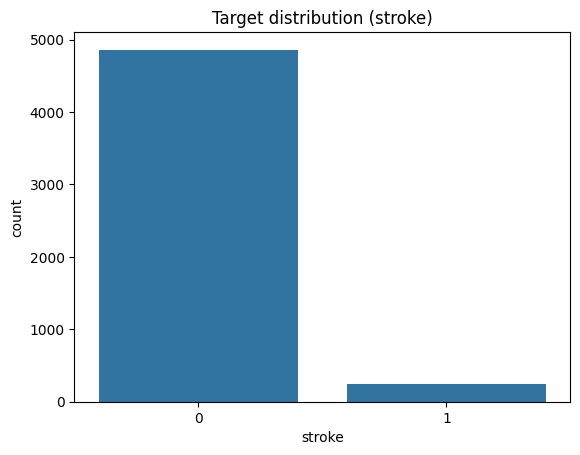

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='stroke', data=df)
plt.title('Target distribution (stroke)')


As we can see most of the stroke values are 0

<Axes: xlabel='stroke', ylabel='age'>

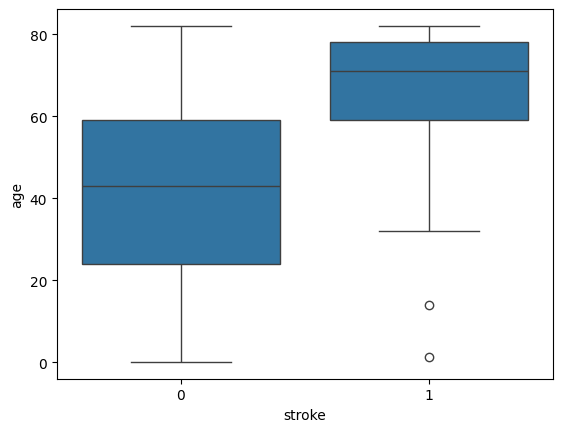

In [10]:
# Boxplot
sns.boxplot(x='stroke', y='age', data=df)


<Axes: xlabel='avg_glucose_level', ylabel='Count'>

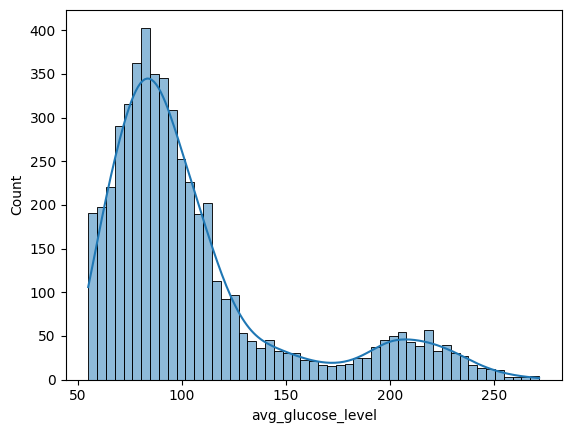

In [11]:
sns.histplot(df['avg_glucose_level'], kde=True)


This histogram shows that the majority of patients have an average glucose level around 80–90. The distribution appears to be right-skewed, with a primary peak in the lower glucose range and a secondary peak around 200, suggesting the presence of two distinct subgroups: one possibly representing patients with normal glucose levels, and the other representing those at risk due to elevated levels.

We can also observe that some patients have extremely high glucose levels, exceeding 250. These could either be outliers or may indicate severe cases of hyperglycemia, which is relevant because hyperglycemia is a well-known risk factor for strokes.

This distribution may justify further analysis to determine whether patients with higher glucose levels are more likely to have suffered a stroke. Understanding this relationship could support the identification of high-risk patients and contribute to the development of predictive models for stroke occurrence.

<Axes: xlabel='stroke', ylabel='avg_glucose_level'>

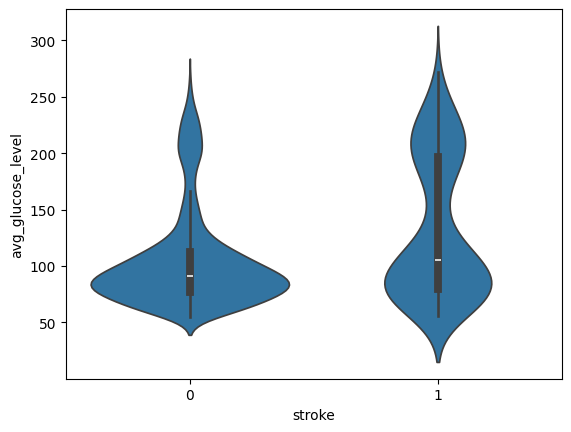

In [12]:
sns.violinplot(x='stroke', y='avg_glucose_level', data=df)

<Axes: >

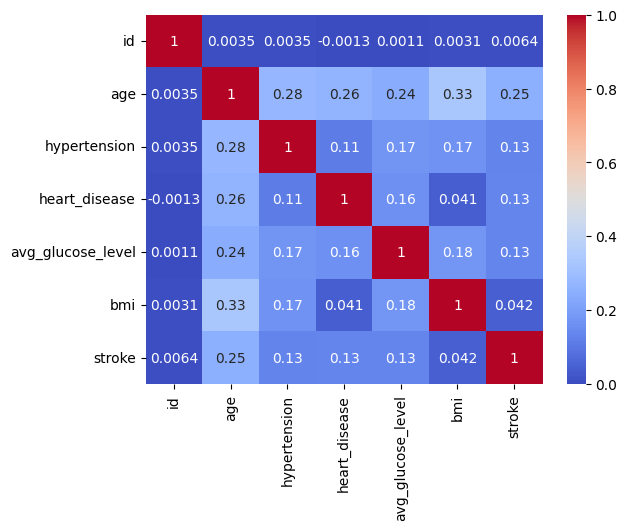

In [13]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')


# Preprocessing : data cleaning, encoding, scaling and splitting


### Handling Missing Values


There are missing values in the `bmi` column. We fill them using the median value to avoid data loss and reduce the influence of outliers.


In [14]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())


### Encoding Categorical Variables

Machine learning models require numerical input. We apply label encoding to binary columns and one-hot encoding to multiclass categorical columns such as `gender`, `work_type`, and `smoking_status`.


In [15]:
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})
df['Residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural': 0})


In [16]:
df = pd.get_dummies(df, columns=['work_type', 'smoking_status', 'gender'], drop_first=True)
# drop_first = True to avoid multicollinearity

### Checking for Class Imbalance


The `stroke` column is imbalanced, with far fewer positive cases. We note this issue and will address it during model training using techniques such as SMOTE or class weighting.


In [17]:
df['stroke'].value_counts(normalize=True)


,proportion
stroke,
0,0.951272
1,0.048728


#### Scaling

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])


### Splitting Features and Target

We separate the dataset into features (`X`) and the target variable (`y`, which is `stroke`) to prepare for model training.


In [19]:
X = df.drop('stroke', axis=1)
y = df['stroke']


### Train/Test Split
We split the dataset into training and test sets using an 80/20 ratio. Stratification is applied to preserve the original distribution of the target variable across both sets.

Questo parametro assicura che la proporzione delle classi nel target (y) sia uguale sia nel train set che nel test set.
Nel caso del dataset Stroke Prediction, il target y è molto sbilanciato (pochi "1", tanti "0").

⚠️ Senza stratify=y, potresti finire con un test set che ha:
* Solo "0" (nessun ictus)
* O un numero troppo alto o troppo basso di "1"

✅ Con stratify=y, il rapporto 0/1 viene mantenuto identico nei due set.




In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


# Baseline Model: Logistic Regression
As a baseline, we apply a simple Logistic Regression model. This allows us to establish a reference performance to compare with more complex models in the next steps. We will evaluate the model using accuracy, confusion matrix, precision, and recall.


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the baseline model
baseline_model = LogisticRegression(max_iter=10000, class_weight='balanced', random_state=42)
baseline_model.fit(X_train, y_train)

# Predict on test set
y_pred = baseline_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))


Accuracy: 0.7495107632093934

Confusion Matrix:
 [[726 246]
 [ 10  40]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.75      0.85       972
           1       0.14      0.80      0.24        50

    accuracy                           0.75      1022
   macro avg       0.56      0.77      0.54      1022
weighted avg       0.94      0.75      0.82      1022



The logistic regression model achieved an overall accuracy of ~75%.

While the precision for the positive class (stroke) is low (0.14), the recall is high (0.80), meaning the model is able to correctly identify most stroke cases.

This trade-off indicates a bias toward capturing positives, which may be acceptable in health-related contexts where missing a positive case is riskier than a false alarm.


### Logistic Regression: Convergence Handling

Initially, the Logistic Regression model raised a convergence warning, even with `max_iter=2000`. After progressively increasing it, the warning disappeared at `max_iter=10000`, confirming that the model needed more iterations to optimize due to the data imbalance and complexity.

This highlights the importance of tuning optimization parameters and monitoring convergence in linear models.


### About `max_iter` in Logistic Regression

The `max_iter` parameter in Logistic Regression defines the maximum number of iterations allowed for the solver to converge. Convergence means the model has found stable coefficients that minimize the loss function.

It is not automatic because solvers may take a long time to converge—especially with unscaled or imbalanced data. To prevent infinite loops or excessive computation, scikit-learn sets a default safety limit (usually 100 or 1000). If convergence is not reached, a `ConvergenceWarning` is raised.


# Defining Models for Comparison
We will train and compare three popular classifiers: Random Forest, K-Nearest Neighbors (KNN), and Support Vector Machine (SVM). Each model will be evaluated using accuracy, precision, recall, F1-score, and confusion matrix to assess their performance.

We create `evaluate_model` function to avoid repeated code.


In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Model:", model.__class__.__name__)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
    print("--------------------------------------------------\n")


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

models = [
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    KNeighborsClassifier(),
    SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)
]

for model in models:
    evaluate_model(model, X_train, y_train, X_test, y_test)


Model: RandomForestClassifier
Accuracy: 0.9500978473581213

Confusion Matrix:
 [[971   1]
 [ 50   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

--------------------------------------------------

Model: KNeighborsClassifier
Accuracy: 0.9510763209393346

Confusion Matrix:
 [[972   0]
 [ 50   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

------------------------------------------

### Model Evaluation and Class Imbalance Impact

#### Random Forest & KNN
- Both models reach **95% accuracy**, but this is misleading.
- The **recall for the minority class (stroke = 1)** is **0.00** so the model does **not detect any strokes**.
- This means the model is **just predicting "no stroke" for everyone**, which is dangerous in real-world scenarios.

#### SVC
- This model captures some stroke cases (recall = 0.18), but still performs poorly.
- Accuracy drops to ~72%, but at least the model attempts to distinguish classes.
- Precision and F1-score for the positive class remain low.

#### Confusion Matrices Summary:
| Model      | TP | FN | FP | TN |
|------------|----|----|----|----|
| RF / KNN   | 0  | 50 | 1  | 971 |
| SVM        | 9  | 41 | 243| 729 |

**Conclusion:** Accuracy is not a reliable metric in imbalanced datasets. In the next step, we will apply techniques such as:
- Resampling (e.g., SMOTE)
- Using `class_weight` and more robust metrics like F1-score


# Class Balancing & Model Re-training

## SMOTE

The original dataset was **highly imbalanced**, with only 5% of positive stroke cases. In such situations, machine learning models tend to ignore the minority class, resulting in poor recall and F1-score for the stroke cases.

To overcome this, we applied **SMOTE**, a technique that generates synthetic samples of the minority class, helping the model learn to recognize stroke patterns more effectively. The resampling was applied only to the training set, while evaluation was performed on the original test set, to ensure realistic validation.

In [24]:
!pip install imbalanced-learn


In [25]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# SMOTE training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Original class distribution:", Counter(y_train))
print("Resampled class distribution:", Counter(y_train_resampled))


Original class distribution: Counter({0: 3889, 1: 199})
Resampled class distribution: Counter({0: 3889, 1: 3889})


### Model re-training

Models are retrained using the balanced dataset.
The evaluation includes accuracy, confusion matrix, and classification report, with a focus on recall and precision for the positive class (stroke = 1).

In [26]:
models = [
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    KNeighborsClassifier(),
    SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)
]

for model in models:
    evaluate_model(model, X_train_resampled, y_train_resampled, X_test, y_test)


Model: RandomForestClassifier
Accuracy: 0.9148727984344422

Confusion Matrix:
 [[929  43]
 [ 44   6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       972
           1       0.12      0.12      0.12        50

    accuracy                           0.91      1022
   macro avg       0.54      0.54      0.54      1022
weighted avg       0.91      0.91      0.91      1022

--------------------------------------------------

Model: KNeighborsClassifier
Accuracy: 0.6066536203522505

Confusion Matrix:
 [[598 374]
 [ 28  22]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.62      0.75       972
           1       0.06      0.44      0.10        50

    accuracy                           0.61      1022
   macro avg       0.51      0.53      0.42      1022
weighted avg       0.91      0.61      0.72      1022

------------------------------------------

### 🔍 Observations after SMOTE

- **Random Forest** performs well in overall accuracy (~91%) but still struggles to identify stroke cases (Recall = 0.14).
- **KNN** shows slightly better recall (0.46) for the stroke class but suffers a major drop in overall accuracy.
- **SVC** shows moderate improvements in recall but still has a very low precision for the minority class.

➡️ Despite the use of SMOTE, all models face challenges in detecting positive cases. This is expected in highly imbalanced datasets where features may not be fully predictive.


# Hyperparameter tuning with GridSearchCV

To further improve model performance, we apply GridSearchCV to perform an exhaustive search over specified hyperparameter values.

The scoring metric used is 'f1', which balances precision and recall for the minority class.

### We tune hyperparameters for:
*  RandomForestClassifier: number of estimators, depth, splitting rules, class weighting.
*  SVC (with pipeline): C value, kernel type, class weighting.



In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definisci la griglia di parametri
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': [None, 'balanced']
}

# Istanzia il modello base
rf = RandomForestClassifier(random_state=42)

# Grid search
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

# Miglior modello e score
print("Best RF params:", grid_search_rf.best_params_)
print("Best RF F1-score:", grid_search_rf.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best RF params: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best RF F1-score: 0.15088115284836595


In [28]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Pipeline con scaler + SVC
pipeline_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

# Griglia di parametri
param_grid_svc = {
    'svc__C': [0.1, 1, 10],
    'svc__gamma': ['scale', 'auto'],
    'svc__kernel': ['rbf', 'linear'],
    'svc__class_weight': [None, 'balanced']
}

# Grid search
grid_search_svc = GridSearchCV(pipeline_svc, param_grid_svc, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search_svc.fit(X_train, y_train)

# Miglior modello e score
print("Best SVC params:", grid_search_svc.best_params_)
print("Best SVC F1-score:", grid_search_svc.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best SVC params: {'svc__C': 10, 'svc__class_weight': 'balanced', 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Best SVC F1-score: 0.22488283196215914


### ✅ Best Parameters Found

- **Random Forest**:
  - Best parameters: `n_estimators=100`, `max_depth=10`, `min_samples_split=5`, `class_weight='balanced'`
  - Best F1-score on validation: **0.15**

- **SVC**:
  - Best parameters: `C=10`, `kernel='linear'`, `class_weight='balanced'`
  - Best F1-score on validation: **0.22**

These scores reflect the model's ability to deal with imbalanced data, focusing on performance over the stroke class (label 1).


 # Evaluation on Test Set with Best Models

We evaluate the best models from GridSearch on the original test set.

This helps understand how well the model generalizes to unseen, real-world data.


In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Per RF
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Per SVC
y_pred_svc = grid_search_svc.best_estimator_.predict(X_test)
print("SVC Classification Report:")
print(classification_report(y_test, y_pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       972
           1       0.21      0.16      0.18        50

    accuracy                           0.93      1022
   macro avg       0.58      0.56      0.57      1022
weighted avg       0.92      0.93      0.92      1022

Confusion Matrix:
 [[942  30]
 [ 42   8]]
SVC Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.73      0.84       972
           1       0.14      0.82      0.23        50

    accuracy                           0.74      1022
   macro avg       0.56      0.78      0.54      1022
weighted avg       0.95      0.74      0.81      1022

Confusion Matrix:
 [[711 261]
 [  9  41]]


### Final Results (Test Set)

#### 🎯 Random Forest
- Accuracy: **93%**
- Precision (class 1): 0.21
- Recall (class 1): 0.16
- The model correctly predicts most non-stroke cases but struggles with true positives (stroke detection).
- Confusion Matrix: TN = 942 | FP = 30 | FN = 42 | TP = 8


#### 🎯 SVC
- Accuracy: **74%**
- Precision (class 1): 0.14
- Recall (class 1): **0.82**
- This model prioritizes recall over precision, identifying most strokes but at the cost of a high false-positive rate.
- Confusion Matrix: TN = 711 | FP = 261 | FN = 9 | TP = 41


### 🔍 Interpretation:
- **Random Forest** is suitable when false positives must be minimized.
- **SVC** is preferable when it is critical to detect all stroke cases, even at the expense of precision.


#  Training a Multi-Layer Perceptron (MLP) Classifier
In this step, we implement a Multi-Layer Perceptron (MLP) classifier using scikit-learn's MLPClassifier. MLPs are feedforward artificial neural networks capable of capturing complex non-linear relationships within data. Before training, we standardize the features to ensure that each has a mean of zero and a standard deviation of one, which is crucial for the effective training of neural networks. After training, we evaluate the model's performance on the test set using metrics such as accuracy, precision, recall, and the confusion matrix.

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


In [31]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train_resampled)

y_pred_mlp = mlp.predict(X_test_scaled)

print("MLP Classification Report:\n", classification_report(y_test, y_pred_mlp))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))


MLP Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.94       972
           1       0.12      0.24      0.16        50

    accuracy                           0.88      1022
   macro avg       0.54      0.58      0.55      1022
weighted avg       0.92      0.88      0.90      1022

Confusion Matrix:
 [[888  84]
 [ 38  12]]


GridSearchCV su MLP

In [32]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [1000]
}

mlp = MLPClassifier(random_state=42)

grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='f1_macro', verbose=2, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters found:", grid_search.best_params_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'adam'}


In [33]:
best_mlp = MLPClassifier(
    hidden_layer_sizes=(50,),
    activation='relu',
    solver='adam',
    alpha=0.01,
    learning_rate='constant',
    max_iter=1000,
    random_state=42
)

best_mlp.fit(X_train_resampled, y_train_resampled)
y_pred_mlp = best_mlp.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print("MLP Classification Report:")
print(classification_report(y_test, y_pred_mlp))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_mlp))


MLP Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.20      0.06      0.09        50

    accuracy                           0.94      1022
   macro avg       0.58      0.52      0.53      1022
weighted avg       0.92      0.94      0.93      1022


Confusion Matrix:
[[960  12]
 [ 47   3]]


### 🔍 Model Evaluation Summary

Despite applying data preprocessing and resampling techniques (such as SMOTE) to balance the classes, the models — including Logistic Regression, Random Forest, SVC, KNN, and MLP — consistently struggled to correctly predict the minority class (stroke cases).

Although most models achieved high overall accuracy (often above 90%), this metric is misleading due to the **strong class imbalance** in the original dataset. Specifically, the **recall and F1-score for the positive class (stroke = 1)** remain very low across all models. For example, the optimized MLP model achieved an accuracy of 94%, but only identified **3 out of 50 stroke cases**, resulting in a recall of 0.06 and an F1-score of 0.09.

These poor results are mainly due to:
- **Severe class imbalance**: Even after resampling, models still tend to favor the majority class during training and prediction.
- **Small minority sample size**: With only 50 positive examples, the model struggles to learn discriminative patterns for stroke cases.
- **Possible feature limitations**: The features in the dataset may lack strong predictive power for the stroke class, or contain hidden biases.
- **Model sensitivity**: Some models, especially neural networks, require more tuning and data volume to generalize well, particularly on rare classes.

In summary, while resampling improved class distribution, it was **not sufficient alone** to ensure strong generalization on the minority class. Future improvements may include:
- Testing alternative models like XGBoost.
- Adjusting decision thresholds.
- Engineering new features or collecting more data.
- Using ensemble techniques or anomaly detection strategies.



# Training an XGBoost Classifier
Here, we employ the XGBoost classifier, a powerful ensemble learning method based on gradient boosting of decision trees. XGBoost is known for its efficiency, speed, and performance, especially with structured data. We train the model on the resampled dataset to address class imbalance and then assess its performance on the test set using standard evaluation metrics

In [34]:
!pip install xgboost


In [35]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=len(y_train_resampled[y_train_resampled == 0]) / len(y_train_resampled[y_train_resampled == 1]))
xgb.fit(X_train_resampled, y_train_resampled)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       972
           1       0.10      0.08      0.09        50

    accuracy                           0.92      1022
   macro avg       0.53      0.52      0.52      1022
weighted avg       0.91      0.92      0.91      1022

Confusion Matrix:
 [[935  37]
 [ 46   4]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:25:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# SMOTEENN TRY

In [36]:
!pip install imbalanced-learn


In [37]:
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.model_selection import train_test_split


### SSMOTEENN

In [38]:
from imblearn.combine import SMOTEENN

smoteenn = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_smoteenn = smoteenn.fit_resample(X_train, y_train)

print("SMOTEENN Resampled shape:", X_train_smoteenn.shape, y_train_smoteenn.shape)


SMOTEENN Resampled shape: (2385, 17) (2385,)


## SMOTETomek

In [39]:
from imblearn.combine import SMOTETomek

smotetomek = SMOTETomek(random_state=42)
X_train_smotetomek, y_train_smotetomek = smotetomek.fit_resample(X_train, y_train)

print("SMOTETomek Resampled shape:", X_train_smotetomek.shape, y_train_smotetomek.shape)


SMOTETomek Resampled shape: (5946, 17) (5946,)


## Models Re-train

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, label=""):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\nModel trained with {label}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

train_and_evaluate_model(rf, X_train_smoteenn, y_train_smoteenn, X_test, y_test, label="SMOTEENN")
train_and_evaluate_model(rf, X_train_smotetomek, y_train_smotetomek, X_test, y_test, label="SMOTETomek")



Model trained with SMOTEENN
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       972
           1       0.09      0.18      0.12        50

    accuracy                           0.87      1022
   macro avg       0.52      0.54      0.52      1022
weighted avg       0.91      0.87      0.89      1022

Confusion Matrix:
[[876  96]
 [ 41   9]]

Model trained with SMOTETomek
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       972
           1       0.11      0.14      0.12        50

    accuracy                           0.90      1022
   macro avg       0.53      0.54      0.54      1022
weighted avg       0.91      0.90      0.91      1022

Confusion Matrix:
[[915  57]
 [ 43   7]]


# New strategy : balancing the dataset

Create a new dataset taking all the strokes = 1 (about 248) and a random subset of cases with stroke = 1 about 15 to 20% of entries

In [47]:
import pandas as pd
from sklearn.utils import shuffle

# Split positive and negative data
df_positive = df[df['stroke'] == 1]
df_negative = df[df['stroke'] == 0]

# Show the positive cases
print(f"Positive samples (stroke=1): {len(df_positive)}")

# Select 1000 negative cases
df_negative_sampled = df_negative.sample(n=1000, random_state=42)

# Combine negative and positive dataframe
df_balanced = pd.concat([df_positive, df_negative_sampled])

# shuffle the data
df_balanced = shuffle(df_balanced, random_state=42).reset_index(drop=True)

# Show the distribution
print("Distribution of the balaced dataset:")
print(df_balanced['stroke'].value_counts(normalize=True))



Positive samples (stroke=1): 249
Distribution of the balaced dataset:
stroke
0    0.800641
1    0.199359
Name: proportion, dtype: float64


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting in X e y
X_balanced = df_balanced.drop('stroke', axis=1)
y_balanced = df_balanced['stroke']

# Train/test split
X_balanced_train, X_balanced_test, y_balanced_train, y_balanced_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y
)

# Scaling
scaler = StandardScaler()
X_balanced_train_scaled = scaler.fit_transform(X_balanced_train)
X_balanced_test_scaled = scaler.transform(X_balanced_test)


In [50]:
models = [
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    KNeighborsClassifier(),
    SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)
]

for model in models:
    evaluate_model(model, X_balanced_train, y_balanced_train, X_balanced_test, y_balanced_test)


Model: RandomForestClassifier
Accuracy: 0.836

Confusion Matrix:
 [[198   9]
 [ 32  11]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91       207
           1       0.55      0.26      0.35        43

    accuracy                           0.84       250
   macro avg       0.71      0.61      0.63       250
weighted avg       0.81      0.84      0.81       250

--------------------------------------------------

Model: KNeighborsClassifier
Accuracy: 0.74

Confusion Matrix:
 [[184  23]
 [ 42   1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       207
           1       0.04      0.02      0.03        43

    accuracy                           0.74       250
   macro avg       0.43      0.46      0.44       250
weighted avg       0.68      0.74      0.71       250

--------------------------------------------------

Model: SVC
Accura

## 📊 Evaluation on Downsampled Balanced Dataset

After applying a downsampling strategy to create a more balanced dataset (retaining all positive stroke cases and randomly selecting a subset of negative cases), we observed a significant improvement in model performance with respect to the minority class (stroke = 1).

- **Random Forest** achieved an F1-score of **0.35** and a precision of **0.55** for the minority class, which is a substantial improvement over previous results on the imbalanced dataset, where F1-scores were often below 0.2.
- **K-Nearest Neighbors (KNN)** and **Support Vector Classifier (SVC)** still struggled to classify the minority class effectively, with very low recall and precision.

This confirms that the original dataset was heavily affected by class imbalance and suffered from the "accuracy trap" — high accuracy but poor ability to detect rare events. After balancing, Random Forest emerged as the best-performing model so far in terms of identifying stroke cases.

This step also demonstrates that **accuracy alone is a misleading metric** in imbalanced classification problems. Instead, we focused on **recall, precision, and F1-score**, especially for the minority class, which is critical in medical prediction tasks.

Next, we will evaluate additional models such as **MLPClassifier** and **XGBoostClassifier** to further compare performance on the balanced dataset.


In [60]:
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Nuovi modelli da testare
extra_models = [
    MLPClassifier(hidden_layer_sizes=(100,), max_iter=2000, random_state=42),
    XGBClassifier(n_estimators=100, eval_metric='logloss', scale_pos_weight=5, random_state=42)
]

for model in extra_models:
    evaluate_model(model, X_balanced_train_scaled, y_balanced_train, X_balanced_test_scaled, y_balanced_test)


Model: MLPClassifier
Accuracy: 0.8

Confusion Matrix:
 [[181  26]
 [ 24  19]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88       207
           1       0.42      0.44      0.43        43

    accuracy                           0.80       250
   macro avg       0.65      0.66      0.66       250
weighted avg       0.80      0.80      0.80       250

--------------------------------------------------

Model: XGBClassifier
Accuracy: 0.76

Confusion Matrix:
 [[173  34]
 [ 26  17]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85       207
           1       0.33      0.40      0.36        43

    accuracy                           0.76       250
   macro avg       0.60      0.62      0.61       250
weighted avg       0.78      0.76      0.77       250

--------------------------------------------------



## 🧠 MLP & XGBoost on Downsampled Balanced Dataset

After testing additional models on the downsampled balanced dataset, we observed further improvements in detecting the minority class (`stroke = 1`):

* **MLPClassifier** achieved an F1-score of **0.43**, with balanced precision (**0.42**) and recall (**0.44**). This marks a strong improvement compared to the imbalanced dataset, where performance on stroke cases was nearly zero.
* **XGBoostClassifier** reached an F1-score of **0.36** and a recall of **0.40**, showing better sensitivity to stroke cases compared to earlier models like KNN and SVC.

These results confirm that downsampling helped reduce class imbalance issues and enabled more meaningful learning for rare events. Among all models tested, **MLPClassifier now shows the best trade-off between sensitivity and overall accuracy**.

We will now proceed to tune and optimize the most promising models.
